In [5]:
import pandas as pd
data = pd.read_csv("national_park_trails.csv")

In [6]:
data.head()

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units
0,10020048,Harding Ice Field Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18852, 'lng': -149.63156}",24.8931,15610.598,1161.8976,5,out and back,3.0,5.0,423,"['dogs-no', 'forest', 'river', 'views', 'water...","['birding', 'camping', 'hiking', 'nature-trips...",i
1,10236086,Mount Healy Overlook Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73049, 'lng': -148.91968}",18.0311,6920.162,507.7968,3,out and back,1.0,4.5,260,"['dogs-no', 'forest', 'views', 'wild-flowers',...","['birding', 'camping', 'hiking', 'nature-trips...",i
2,10267857,Exit Glacier Trail,Kenai Fjords National Park,Seward,Alaska,United States,"{'lat': 60.18879, 'lng': -149.631}",17.7821,2896.812,81.9912,1,out and back,3.0,4.5,224,"['dogs-no', 'partially-paved', 'views', 'wildl...","['hiking', 'walking']",i
3,10236076,Horseshoe Lake Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73661, 'lng': -148.915}",16.2674,3379.614,119.7864,1,loop,2.0,4.5,237,"['dogs-no', 'forest', 'lake', 'kids', 'views',...","['birding', 'hiking', 'nature-trips', 'trail-r...",i
4,10236082,Triple Lakes Trail,Denali National Park,Denali National Park,Alaska,United States,"{'lat': 63.73319, 'lng': -148.89682}",12.5935,29772.790,1124.7120,5,out and back,1.0,4.5,110,"['dogs-no', 'lake', 'views', 'wild-flowers', '...","['birding', 'fishing', 'hiking', 'nature-trips...",i


In [26]:
filtered_df = data[(data['elevation_gain']<500) & (data['length']/1000 < 5) & (data['difficulty_rating']< 4)]
ca_filtered =filtered_df[(filtered_df['state_name'] == 'California')]


ca_filtered['avg_rating'].idxmax()


max_index = ca_filtered['avg_rating'].idxmax()

ca_filtered.loc[ca_filtered['avg_rating'].idxmax()]

#ca_filtered[:ca_filtered['avg_rating'].idxmax()]

226

In [35]:
import re

data['name'].str.contains('land', case=False).sum()

61

In [37]:
ca_parks = data[data['state_name']=='California']

C:\Users\rtnee\anaconda3\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
C:\Users\rtnee\anaconda3\Lib\site-packages\plotnine\layer.py:284: PlotnineWarning: stat_boxplot : Removed 54 rows containing non-finite values.


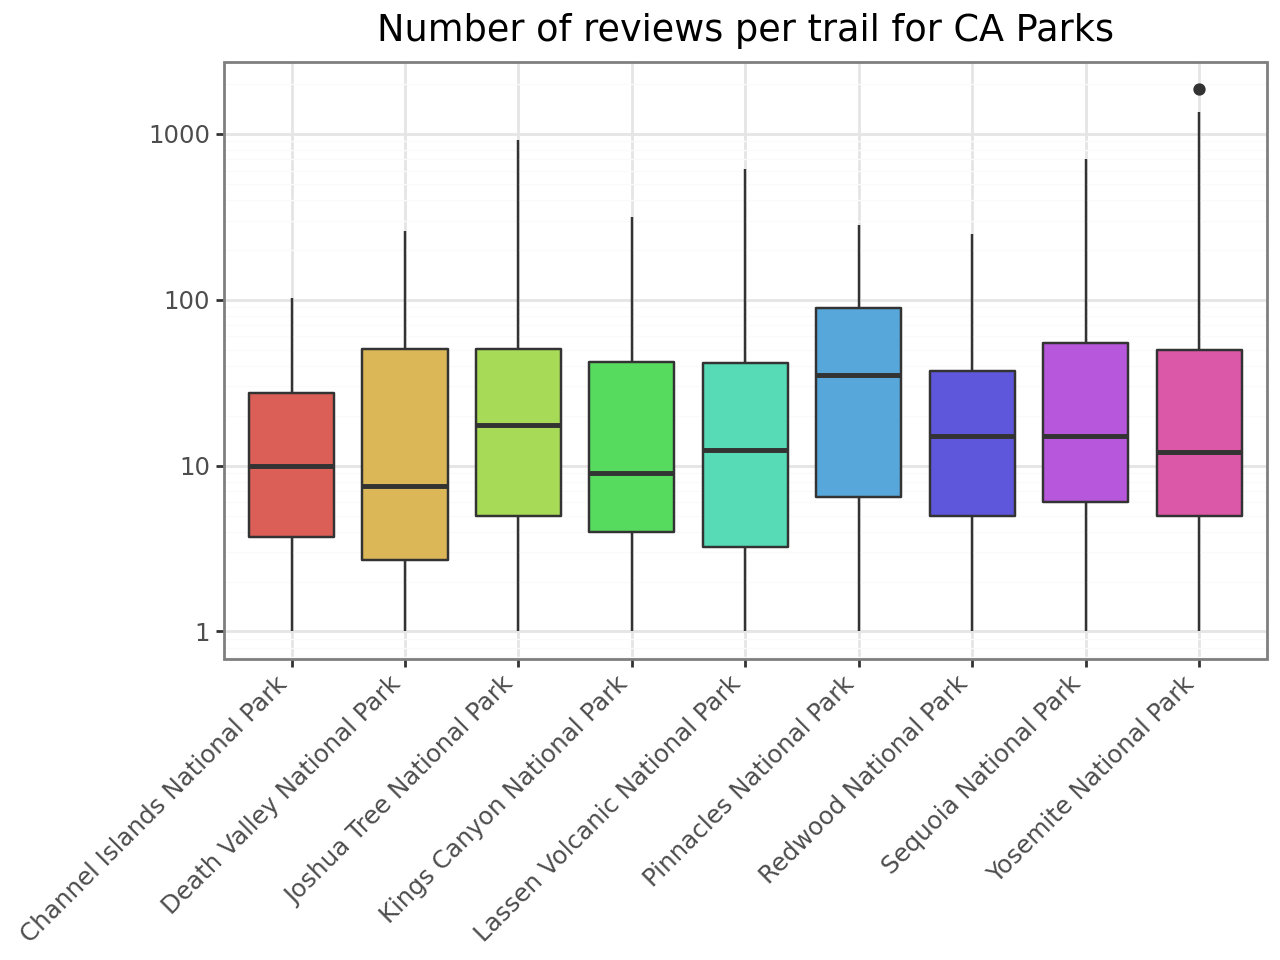

In [46]:
from plotnine import ggplot, aes, geom_boxplot, labs, theme, element_text, theme_bw, guides
from plotnine.scales import scale_x_discrete, scale_y_continuous, scale_y_log10

(ggplot(ca_parks, aes(x="area_name", y="num_reviews", fill = "area_name"))
+ geom_boxplot()
+ scale_y_log10() 
+ scale_x_discrete()
+guides(fill=False)
+ labs(
  x = "",
  y = "",
  title = "Number of reviews per trail for CA Parks"
)
+ theme_bw()
+ theme(axis_text_x=element_text(rotation=45, hjust=1)) 
)

In [50]:
def recommend_trails(dataset, park_name, min_elev=None, max_elev=None, min_rating=None, trail_type=None):
  
  if min_elev is None:
    min_elev = 0  # Set default minimum elevation gain to 0 meters
    
  if max_elev is None:
    max_elev = float('inf')  # Set default maximum elevation gain to infinity
  
  # Start filtering the dataset based on the park name
  filtered_trails = dataset[dataset['area_name'] == park_name]
  
  # Apply filters based on optional arguments
  filtered_trails = filtered_trails[filtered_trails['elevation_gain'] >= min_elev]
  filtered_trails = filtered_trails[filtered_trails['elevation_gain'] <= max_elev]
  
  if min_rating is not None:
    filtered_trails = filtered_trails[filtered_trails['avg_rating'] >= min_rating]
  
  if trail_type is not None:
    filtered_trails = filtered_trails[filtered_trails['rout_type'] == trail_type]
  
  return filtered_trails


In [51]:
recommend_trails(data, "Haleakala National Park", min_elev = 1000, min_rating = 4)

,trail_id,name,area_name,city_name,state_name,country_name,_geoloc,popularity,length,elevation_gain,difficulty_rating,route_type,visitor_usage,avg_rating,num_reviews,features,activities,units
3308,10008302,Silversword Loop Via Halemau'u Trail,Haleakala National Park,Kula,Maui,Hawaii,"{'lat': 20.75275, 'lng': -156.22884}",9.3861,20116.750,1105.8144,5,loop,2.0,4.5,43,"['dogs-no', 'views', 'wild-flowers']","['birding', 'hiking', 'nature-trips']",m
3309,10236001,Keonehe'ehe'e Trail,Haleakala National Park,Kula,Maui,Hawaii,"{'lat': 20.714480000000002, 'lng': -156.25072}",9.1555,28324.384,1171.9560,5,out and back,2.0,5.0,22,"['dogs-no', 'views', 'wildlife']","['backpacking', 'camping', 'hiking']",m
3311,10014989,Kaupo Trail,Haleakala National Park,Kula,Maui,Hawaii,"{'lat': 20.64981, 'lng': -156.137}",8.3240,19312.080,1670.9136,5,out and back,1.0,4.0,8,"['dogs-no', 'views', 'wildlife']",['hiking'],m


In [62]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

def scrape_temps(month=None):
    my_url = "https://www.extremeweatherwatch.com/us-state-averages"
    response = requests.get(my_url)
    soup = BeautifulSoup(response.text, "html.parser")
    
    # Initialize lists to store state names and temperature data
    states = []
    temperatures = []
    
    # Get all states
    state_rows = soup.find('table').find_all('tr')[1:]  # Skip header
    
    for row in state_rows:
        columns = row.find_all('td')
        state = columns[0].text.strip()  # State name in the first column
        states.append(state)

    # Set the URL for the specific month if provided
    if month:
        month_url = get_month_url(month)
        response = requests.get(month_url)
        soup = BeautifulSoup(response.text, "html.parser")
    
    # Get temperatures from the table after month selection
    state_rows = soup.find('table').find_all('tr')[1:]  # Re-fetch after month change

    for row in state_rows:
        columns = row.find_all('td')
        temperature = columns[1].text.strip()  # Assuming the temperature is in the second column
        temperatures.append(temperature)

    # Create a DataFrame
    temp_df = pd.DataFrame({
        'State': states,
        'Temperature': temperatures
    })
    
    return temp_df

def get_month_url(month):
    # This function creates a URL for the specified month.
    month_dict = {
        'January': 'https://www.extremeweatherwatch.com/us-state-averages/month-january',
        'February': 'https://www.extremeweatherwatch.com/us-state-averages/month-february',
        'March': 'https://www.extremeweatherwatch.com/us-state-averages/month-march',
        'April': 'https://www.extremeweatherwatch.com/us-state-averages/april',
        'May': 'https://www.extremeweatherwatch.com/us-state-averages/may',
        'June': 'https://www.extremeweatherwatch.com/us-state-averages/june',
        'July': 'https://www.extremeweatherwatch.com/us-state-averages/july',
        'August': 'https://www.extremeweatherwatch.com/us-state-averages/august',
        'September': 'https://www.extremeweatherwatch.com/us-state-averages/september',
        'October': 'https://www.extremeweatherwatch.com/us-state-averages/october',
        'November': 'https://www.extremeweatherwatch.com/us-state-averages/november',
        'December': 'https://www.extremeweatherwatch.com/us-state-averages/december'
    }

    return month_dict.get(month, "https://www.extremeweatherwatch.com/us-state-averages")  # Return the URL for the specified month or the default URL



scrape_temps(month='February')

,State,Temperature
0,Alabama,60.7
1,Alaska,16.2
2,Arizona,59.3
3,Arkansas,54.8
4,California,57.3
5,Colorado,41.8
6,Connecticut,38.7
7,Delaware,46.5
8,Florida,72.6
9,Georgia,61.9


In [64]:
a = 10

def myfun(a):
  
  a = a + 10
  
  return a


myfun(a)



20

In [65]:
b = 10

def myfun():
  return b + 1

myfun()

11